# GMSL Analysis and Prediction 

In [232]:
import pandas as pd
import seaborn as sb

In [233]:
df = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

In [234]:
df.head().append(df.tail())

,Date,Extent,WaterTemp,O2ml,LandAverageTemperature,LandAndOceanAverageTemperature,CO2,IsGMSLIncreased
0,1969-01,11.412998,13.265000,5.595000,1.966,13.518,324.00,0
1,1969-02,11.419180,12.435000,5.695000,2.450,13.747,324.42,0
2,1969-03,11.425310,15.535000,5.490000,5.131,14.576,325.64,1
3,1969-04,11.431388,12.070000,5.312500,8.576,15.518,326.66,0
4,1969-05,11.437415,12.120000,5.945000,11.354,16.329,327.34,0
535,2013-08,12.338645,12.053062,5.263625,14.742,17.462,395.20,1
536,2013-09,12.298467,12.200875,5.302750,13.154,16.894,393.45,0
537,2013-10,13.236306,12.348688,5.341875,10.256,15.905,393.70,0
538,2013-11,13.405600,12.496500,5.381000,7.424,15.107,395.16,0
539,2013-12,13.066000,13.062250,5.427250,4.724,14.339,396.84,0


#### Podela skupa podataka na training i test

In [235]:
from sklearn.model_selection import train_test_split

X = df.drop(["IsGMSLIncreased", "Date"], axis=1)
Y = df["IsGMSLIncreased"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

#### Normalizaciju vrednosti atributa (z-transformacija)

In [236]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Naive Bayes

In [237]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#### Obučavanje - Naive Bayes

In [238]:
nb.fit(X_train, Y_train)

GaussianNB()

#### Predikcija - Naive Bayes

In [239]:
nb_predictions = nb.predict(X_test)
print("Naive Bayes predictions: ", nb_predictions)

Naive Bayes predictions:  [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1]


#### Score - Naive Bayes

In [240]:
print("Naive Bayes score: ", nb.score(X_test, Y_test))

Naive Bayes score:  0.562962962962963


In [241]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(Y_test, nb_predictions)
print("Accuracy score: ", ac)

Accuracy score:  0.562962962962963


#### F1 Score - Naive Bayes

In [242]:
from sklearn.metrics import f1_score

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.39175258 0.65895954]


#### Report - Naive Bayes

In [243]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.49      0.33      0.39        58
           1       0.59      0.74      0.66        77

    accuracy                           0.56       135
   macro avg       0.54      0.53      0.53       135
weighted avg       0.55      0.56      0.54       135



## SVM klasifikator

In [244]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')

#### Obučavanje - SVM

In [245]:
clf_svm.fit(X_train, Y_train)

SVC()

#### Predikcija - SVM

In [246]:
svm_predictions = clf_svm.predict(X_test)
print("SVM predictions: ", svm_predictions)

SVM predictions:  [1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0]


#### F1 Score - SVM

In [247]:
from sklearn.metrics import f1_score

f1_sc = f1_score(Y_test, nb_predictions, average=None)
print("F1 score: ", f1_sc)

F1 score:  [0.39175258 0.65895954]


#### Report - SVM

In [248]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.49      0.33      0.39        58
           1       0.59      0.74      0.66        77

    accuracy                           0.56       135
   macro avg       0.54      0.53      0.53       135
weighted avg       0.55      0.56      0.54       135



# XGBoost

In [249]:
import xgboost as xgb

#### Ponovno učitavanje dataseta zbog kreiranja dtrain i dtest

In [250]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('processed_datasets/GMSL_analysis_and_prediction.csv', delimiter=',')

X = df.drop(["IsGMSLIncreased", "Date"], axis=1)
Y = df["IsGMSLIncreased"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=35)

In [251]:
dtrain = xgb.DMatrix(X_train, Y_train.astype('category').cat.codes)
dtest = xgb.DMatrix(X_test, Y_test.astype('category').cat.codes)

#### Definisanje parametara modela

In [252]:
params = {
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'objective':'multi:softmax',
    'num_class': 2,
    'eval_metric' : 'merror'
}

#### Obučavanje modela

In [253]:
model = xgb.train(
    params,
    dtrain,
    #evals=[(dtest, "Test")], ovde treba koristiti validacioni skup
    evals=[(dtrain, "Train")],
    #early_stopping_rounds=35,
    num_boost_round=999
)

[0]	Train-merror:0.22222
[1]	Train-merror:0.16049
[2]	Train-merror:0.12099
[3]	Train-merror:0.09383
[4]	Train-merror:0.08642
[5]	Train-merror:0.06173
[6]	Train-merror:0.05679
[7]	Train-merror:0.03704
[8]	Train-merror:0.02469
[9]	Train-merror:0.01728
[10]	Train-merror:0.01482
[11]	Train-merror:0.00988
[12]	Train-merror:0.00247
[13]	Train-merror:0.00494
[14]	Train-merror:0.00000
[15]	Train-merror:0.00000
[16]	Train-merror:0.00000
[17]	Train-merror:0.00247
[18]	Train-merror:0.00000
[19]	Train-merror:0.00000
[20]	Train-merror:0.00000
[21]	Train-merror:0.00000
[22]	Train-merror:0.00000
[23]	Train-merror:0.00000
[24]	Train-merror:0.00000
[25]	Train-merror:0.00000
[26]	Train-merror:0.00000
[27]	Train-merror:0.00000
[28]	Train-merror:0.00000
[29]	Train-merror:0.00000
[30]	Train-merror:0.00000
[31]	Train-merror:0.00000
[32]	Train-merror:0.00000
[33]	Train-merror:0.00000
[34]	Train-merror:0.00000
[35]	Train-merror:0.00000
[36]	Train-merror:0.00000
[37]	Train-merror:0.00000
[38]	Train-merror:0.00

[308]	Train-merror:0.00000
[309]	Train-merror:0.00000
[310]	Train-merror:0.00000
[311]	Train-merror:0.00000
[312]	Train-merror:0.00000
[313]	Train-merror:0.00000
[314]	Train-merror:0.00000
[315]	Train-merror:0.00000
[316]	Train-merror:0.00000
[317]	Train-merror:0.00000
[318]	Train-merror:0.00000
[319]	Train-merror:0.00000
[320]	Train-merror:0.00000
[321]	Train-merror:0.00000
[322]	Train-merror:0.00000
[323]	Train-merror:0.00000
[324]	Train-merror:0.00000
[325]	Train-merror:0.00000
[326]	Train-merror:0.00000
[327]	Train-merror:0.00000
[328]	Train-merror:0.00000
[329]	Train-merror:0.00000
[330]	Train-merror:0.00000
[331]	Train-merror:0.00000
[332]	Train-merror:0.00000
[333]	Train-merror:0.00000
[334]	Train-merror:0.00000
[335]	Train-merror:0.00000
[336]	Train-merror:0.00000
[337]	Train-merror:0.00000
[338]	Train-merror:0.00000
[339]	Train-merror:0.00000
[340]	Train-merror:0.00000
[341]	Train-merror:0.00000
[342]	Train-merror:0.00000
[343]	Train-merror:0.00000
[344]	Train-merror:0.00000
[

[612]	Train-merror:0.00000
[613]	Train-merror:0.00000
[614]	Train-merror:0.00000
[615]	Train-merror:0.00000
[616]	Train-merror:0.00000
[617]	Train-merror:0.00000
[618]	Train-merror:0.00000
[619]	Train-merror:0.00000
[620]	Train-merror:0.00000
[621]	Train-merror:0.00000
[622]	Train-merror:0.00000
[623]	Train-merror:0.00000
[624]	Train-merror:0.00000
[625]	Train-merror:0.00000
[626]	Train-merror:0.00000
[627]	Train-merror:0.00000
[628]	Train-merror:0.00000
[629]	Train-merror:0.00000
[630]	Train-merror:0.00000
[631]	Train-merror:0.00000
[632]	Train-merror:0.00000
[633]	Train-merror:0.00000
[634]	Train-merror:0.00000
[635]	Train-merror:0.00000
[636]	Train-merror:0.00000
[637]	Train-merror:0.00000
[638]	Train-merror:0.00000
[639]	Train-merror:0.00000
[640]	Train-merror:0.00000
[641]	Train-merror:0.00000
[642]	Train-merror:0.00000
[643]	Train-merror:0.00000
[644]	Train-merror:0.00000
[645]	Train-merror:0.00000
[646]	Train-merror:0.00000
[647]	Train-merror:0.00000
[648]	Train-merror:0.00000
[

[916]	Train-merror:0.00000
[917]	Train-merror:0.00000
[918]	Train-merror:0.00000
[919]	Train-merror:0.00000
[920]	Train-merror:0.00000
[921]	Train-merror:0.00000
[922]	Train-merror:0.00000
[923]	Train-merror:0.00000
[924]	Train-merror:0.00000
[925]	Train-merror:0.00000
[926]	Train-merror:0.00000
[927]	Train-merror:0.00000
[928]	Train-merror:0.00000
[929]	Train-merror:0.00000
[930]	Train-merror:0.00000
[931]	Train-merror:0.00000
[932]	Train-merror:0.00000
[933]	Train-merror:0.00000
[934]	Train-merror:0.00000
[935]	Train-merror:0.00000
[936]	Train-merror:0.00000
[937]	Train-merror:0.00000
[938]	Train-merror:0.00000
[939]	Train-merror:0.00000
[940]	Train-merror:0.00000
[941]	Train-merror:0.00000
[942]	Train-merror:0.00000
[943]	Train-merror:0.00000
[944]	Train-merror:0.00000
[945]	Train-merror:0.00000
[946]	Train-merror:0.00000
[947]	Train-merror:0.00000
[948]	Train-merror:0.00000
[949]	Train-merror:0.00000
[950]	Train-merror:0.00000
[951]	Train-merror:0.00000
[952]	Train-merror:0.00000
[

#### Report - XGBoost bez optimizacije parametara

In [254]:
print(classification_report(Y_test.astype('category').cat.codes, model.predict(dtest).astype(int)))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        58
           1       0.67      0.65      0.66        77

    accuracy                           0.61       135
   macro avg       0.61      0.61      0.61       135
weighted avg       0.62      0.61      0.62       135



#### Unakrsna validacija pomoću XGBoost.

In [262]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=42,
    nfold=5,
    metrics={'merror'},
    early_stopping_rounds=10
)

In [263]:
cv_results.head(10)

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.225309,0.028085,0.506173,0.039041
1,0.141975,0.019225,0.523457,0.041757
2,0.112963,0.021258,0.508642,0.026363
3,0.087654,0.017633,0.516049,0.064576
4,0.072222,0.010973,0.516049,0.061183
5,0.049383,0.009954,0.513580,0.053301
6,0.034568,0.008598,0.508642,0.050843
7,0.029630,0.011145,0.516049,0.054321
8,0.022839,0.013036,0.503704,0.051439
9,0.019753,0.009280,0.513580,0.037119


In [270]:
min_error = min(cv_results['test-merror-mean'])

In [271]:
print("Min error: ", min_error)

Min error:  0.4716048


In [272]:
print("Accuracy: ", 1 - min_error)

Accuracy:  0.5283952000000001


#### Minimalan test error je sličan rezultatima koji su dobijeni na test skupu. Accuracy = 1 - error = ~0.6. To znači da je unakrsna validacija relativno dobar indikator onoga što možemo da očekujemo u primeni modela na nepoznate podatke.

#### Značajnost atributa po XGBoost.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

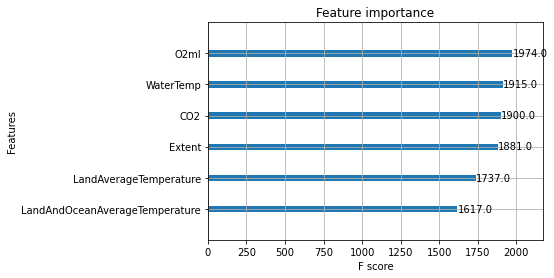

In [269]:
from xgboost import plot_importance

plot_importance(model)